In [1]:
# importing libraries for data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler

# specifying the file & reading it into python
file = "./birthweight_low.xlsx"

birth_weight = pd.read_excel(file)
birth_weight.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birth_weight.shape[0]}
Features:     {birth_weight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



<h3> Exploratory Data Analysis </h3>

In [3]:
# descriptive info for birth_weight to determine if all columns are complete and the type of data included
birth_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [4]:
# descriptive statistics
birth_weight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [5]:
# Suming Missing Varaibles 
birth_weight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [6]:
# looping to detect missing values 
for col in birth_weight:
    if birth_weight[col].isnull().astype(int).sum()> 0:
      birth_weight['m_' +col] = birth_weight[col].isnull().astype(int)
 
# checking for the results of the loop above
birth_weight[   ['m_meduc', 'm_npvis', 'm_feduc']  ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [7]:
# Imputing missing values with the median

# meduc
fill = 14
birth_weight['meduc'] = birth_weight['meduc'].fillna(fill)


# npvis
fill = 12
birth_weight ['npvis'] = birth_weight['npvis'].fillna(fill)


# feduc
fill = 14
birth_weight['feduc'] = birth_weight['feduc'].fillna(fill)


In [8]:
# making sure all missing values have been taken care of
birth_weight.isnull().any().any()

False

<h3> Understanding the variables of Birth Weight - Original and Log 10 </h3>

In [9]:
# log transforming bwght and save it in the dataset
birth_weight['log_bwght'] = np.log(birth_weight['bwght'])

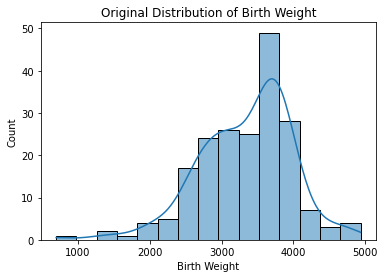

In [10]:
# analyzing the distribution of Y (bwght) via histogram 

sns.histplot(data = birth_weight, 
             x    = 'bwght', 
             kde  = True)

plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight")
plt.ylabel(ylabel = "Count")

plt.show()

# the histogram reflects a left skewness of birth weight

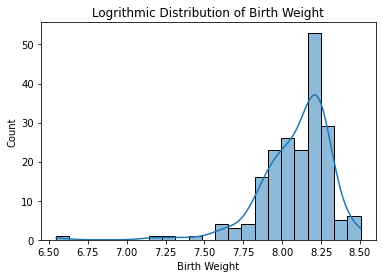

In [11]:
# creating a histogram using hisplot for log bwght
sns.histplot(data = birth_weight,
             x    = 'log_bwght',
             kde  = True)

plt.title(label   = "Logrithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight")
plt.ylabel(ylabel = "Count")

plt.show()




In [12]:
# log transforming X - variables that are skewed

# log transforming fage and saving it to the dataset
birth_weight['log_fage'] = np.log(birth_weight['fage'])

# log transforming mage and saving it to the dataset
birth_weight['log_mage'] = np.log(birth_weight['mage'])


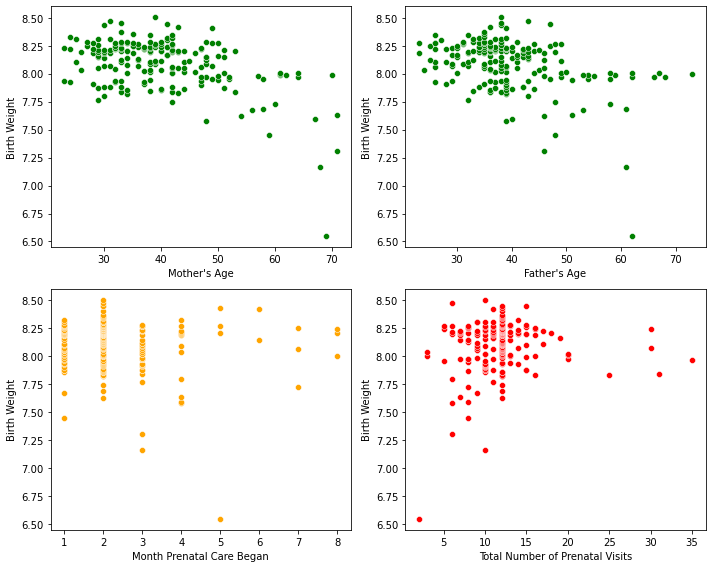

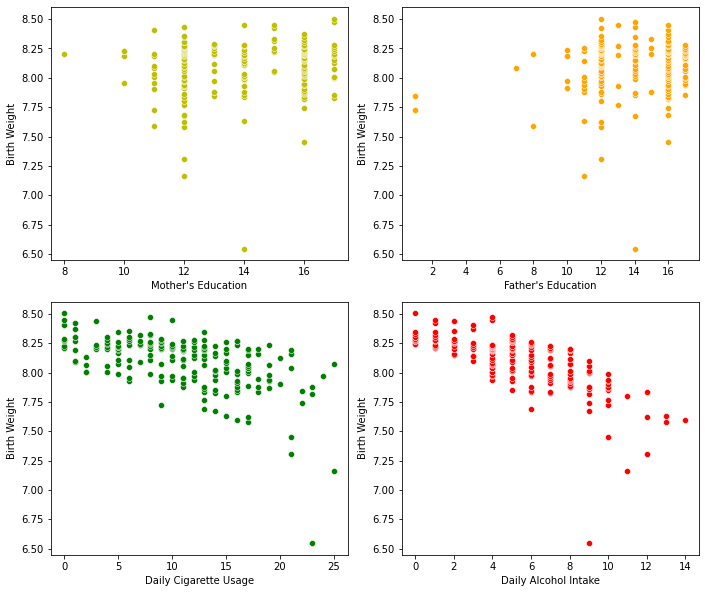

In [13]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birth_weight['mage'],
                y = birth_weight['log_bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birth_weight['fage'],
                y = birth_weight['log_bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birth_weight['monpre'],
                y = birth_weight['log_bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Month Prenatal Care Began')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birth_weight['npvis'],
                y = birth_weight['log_bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birth_weight['meduc'],
                y = birth_weight['log_bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birth_weight['feduc'],
                y = birth_weight['log_bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birth_weight['cigs'],
                y = birth_weight['log_bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Daily Cigarette Usage')
plt.ylabel(ylabel = 'Birth Weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birth_weight['drink'],
                y = birth_weight['log_bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Daily Alcohol Intake')
plt.ylabel(ylabel = 'Birth Weight')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<h3> New Variables :</h3>

<p>Academic Research highlights an increase in low birth weights due to the a variety of issues. Some factors include variables such as 'cigs','drink','npvis, 'monpre, 'meduc','mage', 'fage', 'mwhte','mblck', 'mothr','fage','fwhte','fblck',  and 'fothr'. However, combining some of these factors increase low birth weights. </p>

<p>According to the published article "Preterm labor occurred more frequently in women who drank and smoked during pregnancy. This increased odds ratio was more than the sum of the effects of either smoking or drinking, indicating that the use of both substances by the same woman has a synergistic effect that increases the risk of preterm labor. This synergistic effect was also found for low birth weight and growth restriction" (Odendaal, Steyn, et al., 2009).</p>

Additionally, other reports state that the impact of a mother's education, age, socio-economic status,race and residence contribute to low birth weights. Mothers who are younger and less educated are at higher risk to give birth to lower birth weight children (Maznah, Azahar, et al., 2016).  


<h4>Citations:</h4>
Dahlui, M., Azahar, N., Oche, M. O., & Norlaili, A. A. (2016). Risk factors for low birth weight in nigeria: Evidence from the 2013 nigeria demographic and health survey. Global Health Action, 9(1) doi:http://dx.doi.org/10.3402/gha.v9.28822. Retrieved from https://www.proquest.com/docview/2215231385/190A4054BFE94945PQ/5?accountid=78988


Odendaal HJ, Steyn DW, Elliott A, Burd L. Combined effects of cigarette smoking and alcohol consumption on perinatal outcome. Gynecol Obstet Invest. 2009;67(1):1-8. doi: 10.1159/000150597. Epub 2008 Aug 6. PMID: 18685256; PMCID: PMC8252129. Retrieved from https://pubmed.ncbi.nlm.nih.gov/18685256/



In [14]:
# New variables based on research from medical sources

# effects of cigarette and alcohol intake 
birth_weight['cigs_drink'] = birth_weight['cigs']+(birth_weight['drink'] /2)

# effects of mother's education and age 
birth_weight['mage_meduc'] = birth_weight['mage']+(birth_weight['meduc'] /2)

# effects of father's education and age 
birth_weight['fage_feduc'] = birth_weight['fage']+(birth_weight['feduc'] /2)

# effects of mother's race and age 
birth_weight['mage_mblck'] = birth_weight['mage']+(birth_weight['mblck'] /2)
birth_weight['mage_moth'] = birth_weight['mage']+(birth_weight['mwhte'] /2)

# effects of prenatal care and mother's education
birth_weight['npvis_meduc'] = birth_weight['npvis']+(birth_weight['meduc'] /2)

# effects of prenatal care and # of visits
birth_weight['npvis_monpre'] = birth_weight['npvis'] *(birth_weight['monpre'])

# effects of prenatal care and age
birth_weight['npvis_mage'] = birth_weight['npvis']*(birth_weight['mage'])

# effects of prenatal care and meduc
birth_weight['npvis_meduc'] = birth_weight['npvis']+(birth_weight['meduc'] /2)

# effects of mother's race and # of visits
birth_weight['mblck_monpre'] = birth_weight['mblck']+(birth_weight['monpre'] /2)
birth_weight['moth_monpre'] = birth_weight['moth']+(birth_weight['monpre'] /2)
birth_weight['mwhte_monpre'] = birth_weight['mwhte']+(birth_weight['monpre'] /2)

# effects of prenatal care and mother's race
birth_weight['npvis_mblck'] = birth_weight['npvis']+(birth_weight['mblck'] /2)
birth_weight['npvis_mwhte'] = birth_weight['npvis']+(birth_weight['mwhte'] /2)
birth_weight['npvis_moth'] = birth_weight['npvis']+(birth_weight['moth'] /2)

# effects of cigarette and education 
birth_weight['cigs_meduc'] = birth_weight['cigs']+(birth_weight['meduc'] /2)

# effects of cigarette and month prental care began
birth_weight['cigs_monpre'] = birth_weight['cigs']*(birth_weight['monpre'])
                                                        
# effects of drink and month prental care began
birth_weight['drink_monpre'] = birth_weight['cigs']*(birth_weight['monpre'])                                                         
                                                        
# effects of parents education and age 
birth_weight['parents_age_educ'] = birth_weight['mage_meduc']+(birth_weight['fage_feduc'] /2)

birth_weight['parents_age'] = birth_weight['mage']+(birth_weight['fage'] /2)
birth_weight['parents_educ'] = birth_weight['meduc']+(birth_weight['feduc'] /2)

# effects of parent's race 
birth_weight['fblck_mblck'] = birth_weight['fblck']*(birth_weight['mblck'])
birth_weight['foth_mblck'] = birth_weight['foth']*(birth_weight['mblck'])
birth_weight['fwhte_mblck'] = birth_weight['fwhte']*(birth_weight['mblck'])

birth_weight['foth_moth'] = birth_weight['foth']*(birth_weight['moth'])
birth_weight['fblck_moth'] = birth_weight['fblck']*(birth_weight['moth'])
birth_weight['fwhte_moth'] = birth_weight['fwhte']*(birth_weight['moth'])

# effects of father's age and prenatal care 
birth_weight['fage_npvis'] = birth_weight['fage']+(birth_weight['npvis'] /2)
birth_weight['feduc_npvis'] = birth_weight['feduc']+(birth_weight['npvis'] /2)
birth_weight['feduc_monpre'] = birth_weight['feduc']+(birth_weight['monpre'] /2)
birth_weight['fage_monpre'] = birth_weight['fage']+(birth_weight['monpre'] /2)

In [15]:
# Correlation of all variables 

# creating a (Pearson) correlation matrix
birth_weight_corr = birth_weight.corr().round(2)

# printing (Pearson) correlations with birthweight
print(birth_weight_corr.loc['bwght'].sort_values(ascending = False))

bwght               1.00
log_bwght           0.97
omaps               0.25
fmaps               0.25
fwhte_moth          0.20
foth_mblck          0.14
feduc_npvis         0.14
mblck               0.13
feduc               0.13
parents_educ        0.12
feduc_monpre        0.12
fblck               0.12
fblck_mblck         0.11
male                0.11
meduc               0.09
npvis_meduc         0.08
npvis_mblck         0.07
npvis               0.06
npvis_moth          0.06
npvis_mwhte         0.06
m_npvis             0.06
npvis_monpre        0.04
mblck_monpre        0.03
fblck_moth          0.03
m_feduc            -0.00
moth               -0.02
fwhte              -0.04
monpre             -0.05
moth_monpre        -0.06
fwhte_mblck        -0.07
foth               -0.08
mwhte_monpre       -0.10
mwhte              -0.11
foth_moth          -0.12
m_meduc            -0.13
npvis_mage         -0.14
fage_feduc         -0.37
fage_npvis         -0.38
log_fage           -0.38
fage               -0.40


In [16]:
# Correlation of all variables using log 

# creating a (Pearson) correlation matrix
birth_weight_corr = birth_weight.corr().round(2)

# printing (Pearson) correlations with birthweight
print(birth_weight_corr.loc['log_bwght'].sort_values(ascending = False))

log_bwght           1.00
bwght               0.97
fmaps               0.32
omaps               0.31
fwhte_moth          0.17
feduc_npvis         0.17
feduc               0.13
npvis_meduc         0.13
foth_mblck          0.12
feduc_monpre        0.12
parents_educ        0.12
npvis_mblck         0.12
npvis               0.11
npvis_moth          0.11
npvis_mwhte         0.11
mblck               0.09
meduc               0.09
fblck               0.09
fblck_mblck         0.08
male                0.08
m_npvis             0.06
npvis_monpre        0.05
fblck_moth          0.03
moth                0.00
mblck_monpre       -0.02
foth               -0.04
fwhte              -0.04
fwhte_mblck        -0.06
foth_moth          -0.08
moth_monpre        -0.08
monpre             -0.09
m_feduc            -0.09
npvis_mage         -0.10
mwhte              -0.11
mwhte_monpre       -0.13
m_meduc            -0.24
fage_npvis         -0.38
log_fage           -0.39
fage_feduc         -0.39
fage               -0.41


In [17]:
# printing the columns in bwght
for column in birth_weight: 
    print( f" {column} + ")

 mage + 
 meduc + 
 monpre + 
 npvis + 
 fage + 
 feduc + 
 omaps + 
 fmaps + 
 cigs + 
 drink + 
 male + 
 mwhte + 
 mblck + 
 moth + 
 fwhte + 
 fblck + 
 foth + 
 bwght + 
 m_meduc + 
 m_npvis + 
 m_feduc + 
 log_bwght + 
 log_fage + 
 log_mage + 
 cigs_drink + 
 mage_meduc + 
 fage_feduc + 
 mage_mblck + 
 mage_moth + 
 npvis_meduc + 
 npvis_monpre + 
 npvis_mage + 
 mblck_monpre + 
 moth_monpre + 
 mwhte_monpre + 
 npvis_mblck + 
 npvis_mwhte + 
 npvis_moth + 
 cigs_meduc + 
 cigs_monpre + 
 drink_monpre + 
 parents_age_educ + 
 parents_age + 
 parents_educ + 
 fblck_mblck + 
 foth_mblck + 
 fwhte_mblck + 
 foth_moth + 
 fblck_moth + 
 fwhte_moth + 
 fage_npvis + 
 feduc_npvis + 
 feduc_monpre + 
 fage_monpre + 


<h3> Base Model </h3>

In [18]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~      
cigs +
drink +
mblck +
mwhte_monpre +
moth_monpre 
       


""",
                               data = birth_weight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     75.38
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           3.08e-43
Time:                        10:28:06   Log-Likelihood:                -1439.0
No. Observations:                 196   AIC:                             2890.
Df Residuals:                     190   BIC:                             2910.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4567.2759     99.148     46.065      0.000    4371.703    4762.849
cigs           -37.9368      4.873     -7.785      0.000     -47.549     -28.325
drink         -132.6187      9.824    -13.500      0.000    -151.996    -113.241
mblck          -36.6103     58.681     -0.624      0.533    -152.361      79.141
mwhte_monpre   -28.6773     38.356     -0.748      0.456    -104.336      46.982
moth_monpre    -31.2160     43.852     -0.712      0.477    -117.716      55.284
==============================================================================
Omnibus:                       13.204   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.843
Skew:                          -0.365   Prob(JB):                     1.81e-05
Kurtosis:                       4.464   Cond. No.                         54.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3> Training & Testing Model </h3>

In [19]:
# preparing explanatory variable data
birth_weight_data   = birth_weight.drop(["bwght"],
                               axis = 1)


# preparing response variables
birth_weight_target = birth_weight.loc[ : , "bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_weight_data,
            birth_weight_target, #can be changed to log as a comparison 
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 53)
y-side: (147,)


Testing Data
------------
X-side: (49, 53)
y-side: (49,)



In [20]:
# declaring set of x-variables
x_variables = ['cigs','drink','mblck', 'mwhte_monpre', 'moth_monpre']

    
    

#'cigs','drink','mblck', 'parents_age_edu', 'moth'
#             'monpre', 'mwhte_monpre', 'moth_monpre']


In [21]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birth_weight.loc[ : , x_variables ]


# preparing response variable
birth_weight_target = birth_weight.loc[ : , 'bwght']


###############################################
# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
           birth_weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [22]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6486
OLS Testing Score  : 0.7203
OLS Train-Test Gap : 0.0717


In [23]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.647
Lasso Testing Score  : 0.7212
Lasso Train-Test Gap : 0.0742


In [24]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS,y_train_OLS)


# PREDICTING on new data
ard_pred = ard_model.predict(x_train_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :', ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6461
Testing Score : 0.7249
ARD Train-Test Gap : 0.0788


In [25]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 8)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_OLS)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_OLS, y_train_OLS).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_OLS, y_train_OLS).round(4)
knn_reg_score_test  = knn_reg.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6908
KNN Testing Score : 0.6601
KNN Train-Test Gap: 0.0307


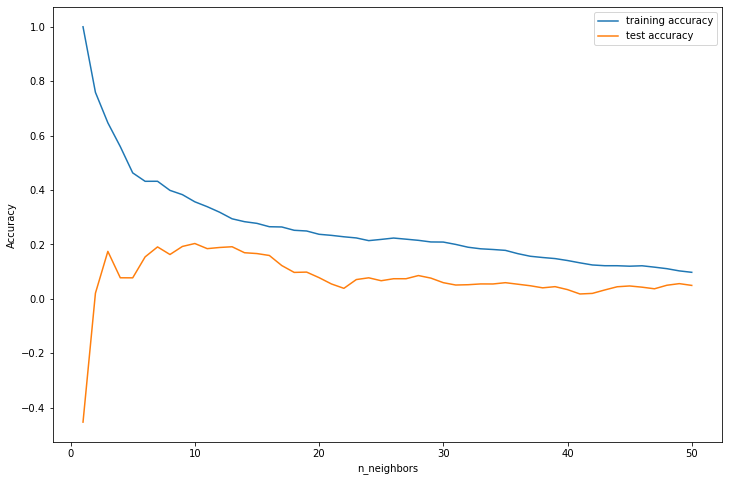

In [26]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [27]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 10


In [28]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
ARD        {ard_train_score}           {ard_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
KNN        {knn_reg_score_train}           {knn_reg_score_test}

*final model is OLS
""")



Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6486           0.7203
ARD        0.6461           0.7249
Lasso      0.647            0.7212
KNN        0.6908           0.6601

*final model is OLS

